# HW 4: MLE/MAP

```{warning}
The submission of the homeworks has **NO** deadline. You can submit them whenever you want, on Virtuale. You are only required to upload it on Virtuale **BEFORE** your exam session, since the Homeworks will be a central part of the oral exam. 

You are asked to submit the homework as one of the two, following modalities:
* A PDF (or Word) document, containing screenshoots of code snippets, screeshots of the results generated by your code, and a brief comment on the obtained results.
* A Python Notebook (i.e. a `.ipynb` file), with cells containing the code required to solve the indicated exercises, alternated with a brief comment on the obtained results in the form of a markdown cell. We remark that the code **SHOULD NOT** be runned during the exam, but the student is asked to enter the exam with all the programs **already executed**, with the results clearly visible on the screen.

Joining the oral exam with a non-executed code OR without a PDF file with the obtained results visible on that, will cause the student to be rejected.
```

## Maximum Likelihood Estimation (MLE) and Maximum a Posteriori (MAP)
Consider the theory and the notation provided in the the MLE/MAP section (https://devangelista2.github.io/statistical-mathematical-methods/regression_classification/MLE_MAP.html). Let $f_\theta(x)$ be a polynomial regression model as in the previous Homework, and let the `poly_regression_small.csv` from Virtuale be the training set. Then, sample 20% of the data in the `poly_regression_large.csv` dataset to use as test set.

* For a given value of $K$, write three Python functions computing $\theta_{MLE}$, i.e. the optimal parameters obtained by optimizing the MLE-related loss function with Gaussian assumption on the likelihood $p_\theta(y | x)$, by Gradient Descent, Stochastic Gradient Descent (with a `batch_size` = 5), and Normal Equations method with Cholesky Decomposition.
* Compare the performance of the three regression model computed above. In particular, if $(X_{test}, Y_{test})$ is the test set from the `poly_regression_large.csv` dataset, for each of the model, compute:

  $$
  Err = \frac{1}{N_{test}} \sum_{i=1}^{N_{test}} (f_\theta(x^i) - y^i)^2,
  $$

  where $N_{test}$ is the number of elements in the test set, $(x^i, y^i)$ are the input and output elements in the test set. Comment the performance of the three models. 
* For different values of $K$, plot the training datapoints and the test datapoints with different colors and visualize (as a continuous line) the three learned regression model $f_\theta(x)$. Comment the results.
* For increasing values of $K$, compute the training and test error as discussed above. Plot the two errors with respect to $K$. Comment the results.
* Repeat the same experiments by considering the MAP formulation with Gaussian assumption on the prior term $p(\theta)$. Set $K = 8$ and test different values of $\lambda > 0$ in the experiments. Comment the results, comparing:
  - the three optimization method used to obtain $\theta_{MAP}$ (i.e. GD, SGD and Normal Equations),
  - the different values of $\lambda > 0$ tested,
  - the results obtained by $\theta_{MLE}$ vs $\theta_{MAP}$.

In [140]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('../../data-20241122/poly_regression_large.csv')
X, y = data["x"].values, data["y"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def f(x, theta):
    y = 0
    for j in range(len(theta)):
        y = y + theta[j] * x**j
    return y


def grad_loss(theta, X, y, lambda_):
    N = len(y)  # Number of samples
    gradient = np.zeros_like(theta)  # Initialize gradient vector

    for j in range(len(theta)):  # Loop over each parameter
        gradient[j] = (2 / N) * np.sum((f(X, theta) - y) * X**j) + 2 * lambda_ * theta[j]
        # Add regularization term (2 * lambda * theta_j)
    
    return gradient


## We start with the first function theta_GD_train
def theta_GD_train(X, y, K, alpha, n_epochs, lambda_ = 0):
    theta = np.zeros(K + 1)  
 
    ## We iterate over the number of epochs
    for i in range(n_epochs):
        # We find the gradient of the function given the actual state
 
        gradient = grad_loss(theta, X, y, lambda_)
        # We update the weights
        theta -= alpha * gradient
    return theta


def theta_SGD_train(X, y, K, alpha, n_epochs, batch_size, lambda_ = 0):
    theta = np.zeros(K + 1) 
    d = theta.shape[0]
    # theta_history = np.zeros((n_epochs, d))
    N = len(y)
    idx = np.arange(0, N)
    for epoch in range(n_epochs):
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]
        for batch_start in range(0, N, batch_size):
            batch_end = min(batch_start + batch_size, N)
            X_batch = X[batch_start:batch_end]
            y_batch = y[batch_start:batch_end]

            gradient = grad_loss(theta, X_batch, y_batch, lambda_)
            theta -= alpha * gradient
    return theta

def vandermonde(x, K, N):
    # Returns PhiX of degree K
    PhiX = np.zeros((K+1, N))
    for j in range(K+1):
        PhiX[j, :] = x**j
    return PhiX

def theta_NE_train(X, y, K):
    N = len(X)
    PhiX = vandermonde(X, K, N) # Create polynomial features
    A = PhiX @ PhiX.T
    b = PhiX @ y
    L = np.linalg.cholesky(A)  # Cholesky decomposition
    z = np.linalg.solve(L, b)
    theta = np.linalg.solve(L.T, z)  # Solve using Cholesky factors
    return theta



In [141]:
## We set our variables
K_array = [2, 4, 5, 7, 10]
batch_size = 5
alpha = 0.01
n_epochs = 100
K = 10
# We obtain different theta sets training our different models
# theta_GD = theta_GD_train(X_train, y_train, K, alpha, n_epochs)
theta_SGD = theta_SGD_train(X_train, y_train, K, alpha, n_epochs, batch_size)
print(theta_SGD)
theta_ne = theta_NE_train(X_train, y_train, K)
print(theta_ne)


[-0.10594059  1.3279413   0.81636339  0.3157675   0.00417382 -0.16616855
 -0.24823673 -0.27781857 -0.27705244 -0.25934679 -0.23278017]
[-1.79360587e-02 -1.59389622e-01  2.38700783e-01  7.28791152e+01
 -3.93933864e+02  1.00988090e+03 -1.48273152e+03  1.38132593e+03
 -9.17157796e+02  4.40240340e+02 -1.09576122e+02]


In [142]:
## We want to evaluate the performances of our models, comparing them to each others
def compute_error(f, theta, X_test, y_test):
    N_test = len(X_test)
    predictions = f(X_test, theta)
    error = (1 / N_test) * np.sum((predictions - y_test)**2)
    return error

def compare(K_array):
    for K in K_array:
        print(f"Given we are using K:{K}")
        theta_GD = theta_GD_train(X_train, y_train, K, alpha, n_epochs)
        theta_SGD = theta_SGD_train(X_train, y_train, K, alpha, n_epochs, batch_size)
        theta_ne = theta_NE_train(X_train, y_train, K)

        error_gd = compute_error(f, theta_GD, X_test, y_test)
        error_sgd = compute_error(f, theta_SGD, X_test, y_test)
        error_ne = compute_error(f, theta_ne, X_test, y_test)

        print("Test Error (Gradient Descent): ----------", round(error_gd, 4))
        print("Test Error (Stochastic Gradient Descent):", round(error_sgd, 4))
        print("Test Error (Normal Equations): ----------", round(error_ne, 4))


In [143]:
compare(K_array)


Given we are using K:4
Test Error (Gradient Descent): 0.0832
Test Error (SGD): 0.0139
Test Error (Normal Equations): 0.0091
Given we are using K:5
Test Error (Gradient Descent): 0.0845
Test Error (SGD): 0.0112
Test Error (Normal Equations): 0.009
Given we are using K:7
Test Error (Gradient Descent): 0.0891
Test Error (SGD): 0.0097
Test Error (Normal Equations): 0.0091
Given we are using K:10
Test Error (Gradient Descent): 0.0942
Test Error (SGD): 0.0101
Test Error (Normal Equations): 0.009


We then visualize the distribution of train_set and test_set, adding the different curves on top so to compare which method overfits and which ends up being more reliable compared to the "true function"

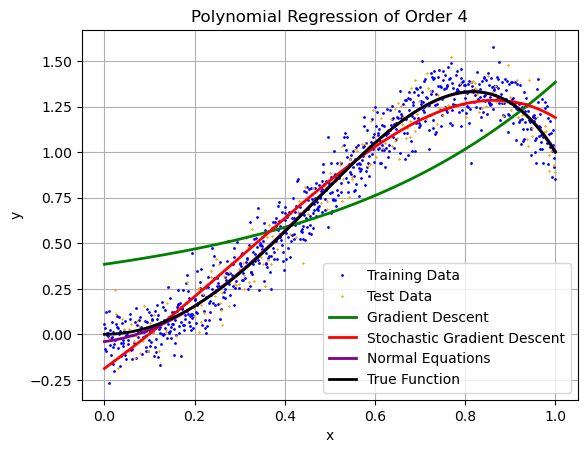

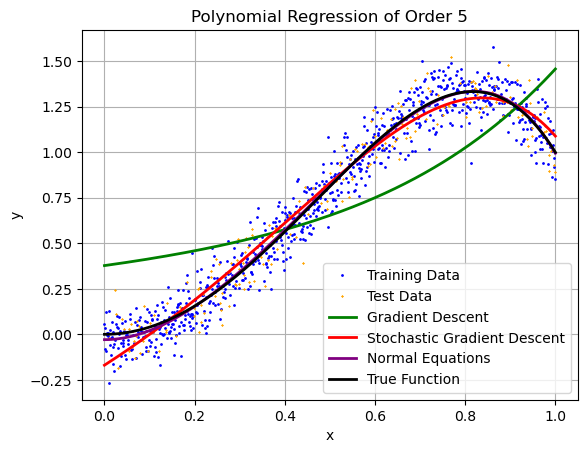

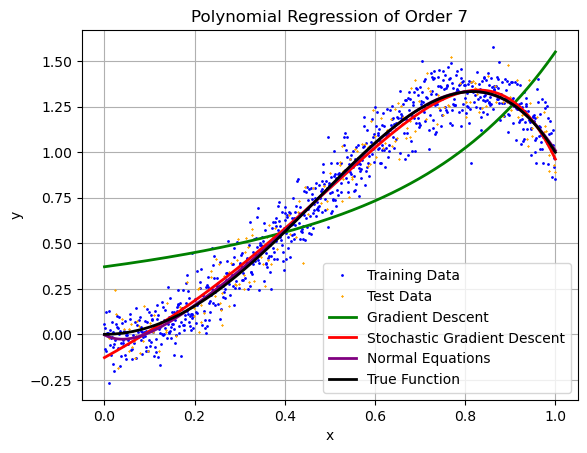

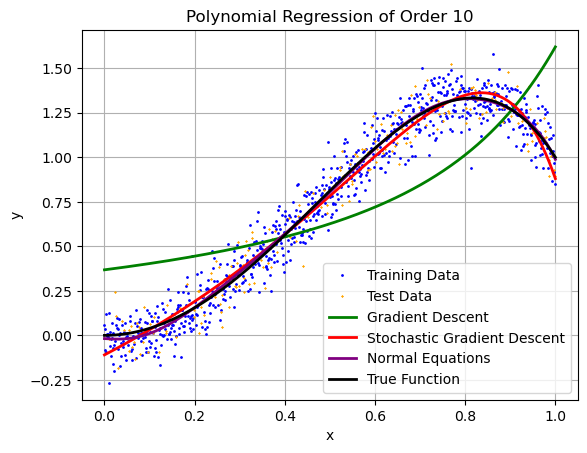

In [144]:
import matplotlib.pyplot as plt

for K in K_array:
    # Scatter plots for training and test data
    plt.plot(X_train, y_train, 'o', label="Training Data", markersize=1, color="blue")
    plt.plot(X_test, y_test, 'x', label="Test Data", markersize=1, color="orange")

    # Compute theta values
    theta_GD = theta_GD_train(X_train, y_train, K, alpha, n_epochs)
    theta_SGD = theta_SGD_train(X_train, y_train, K, alpha, n_epochs, batch_size)
    theta_ne = theta_NE_train(X_train, y_train, K)
    theta_true = [0, 0, 4, 0, -3]

    # Plot the fitted functions with different styles and colors
    plt.plot(X, f(X, theta_GD), label="Gradient Descent", linewidth=2, color="green")
    plt.plot(X, f(X, theta_SGD), label="Stochastic Gradient Descent", linewidth=2, color="red")
    plt.plot(X, f(X, theta_ne), label="Normal Equations", linewidth=2, color="purple")
    plt.plot(X, f(X, theta_true), label="True Function", linewidth=2, color="black")

    # Add labels, title, legend, and grid
    plt.title(f"Polynomial Regression of Order {K}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.legend(loc="best")  # Automatically position the legend

    # Show the plot
    plt.show()


We can notice how, as expected, the normal equation gets very close to the "true function", though it's often quite hard to compute. It's quite clear how the SDG trained model might be a fitting substitute as it's easier and faster to compute, still retaining a high level of accuracy.

Let's compare the errors on the training and test sets:

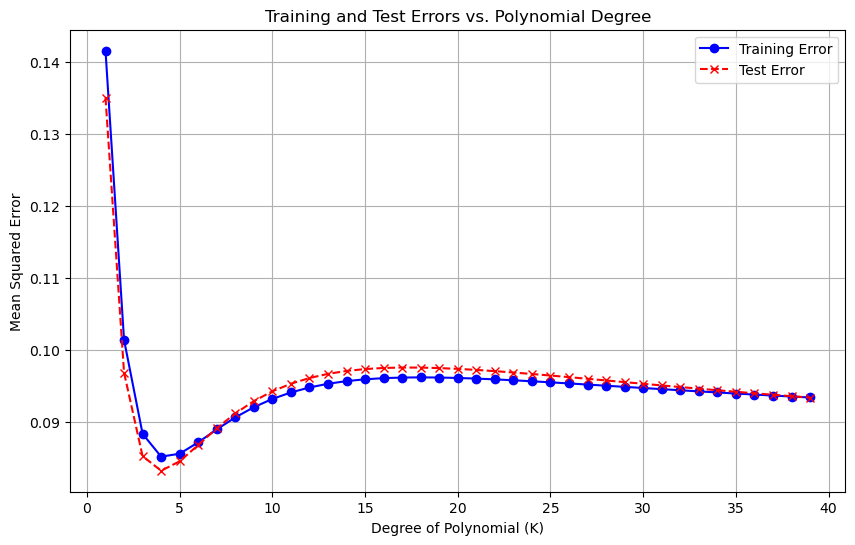

In [145]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize arrays to store errors
K_values = range(1, 40)  # Polynomial degrees from 1 to 9
training_errors = []
test_errors = []

# Loop through increasing values of K
for K in K_values:
    # Fit model using Normal Equations (or any other method)
    theta_ne = theta_GD_train(X_train, y_train, K, 0.01, 100)
    
    # Compute training and test errors
    train_error = compute_error(f, theta_ne, X_train, y_train)  # Training error
    test_error = compute_error(f, theta_ne, X_test, y_test)    # Test error
    
    # Append errors to the lists
    training_errors.append(train_error)
    test_errors.append(test_error)

# Plot the training and test errors
plt.figure(figsize=(10, 6))
plt.plot(K_values, training_errors, label="Training Error", marker='o', linestyle='-', color="blue")
plt.plot(K_values, test_errors, label="Test Error", marker='x', linestyle='--', color="red")
plt.xlabel("Degree of Polynomial (K)")
plt.ylabel("Mean Squared Error")
plt.title("Training and Test Errors vs. Polynomial Degree")
plt.legend()
plt.grid()
plt.show()


## MAP solution

In [160]:
## We define some hyperparameters
K = 8
lambda_ = [0, 0.2, 0.5, 0.8, 1] # We want to test our model over different lambda values
batch_size = 5
alpha = 0.01
n_epochs = 100

In [161]:
X_train.shape

(800,)

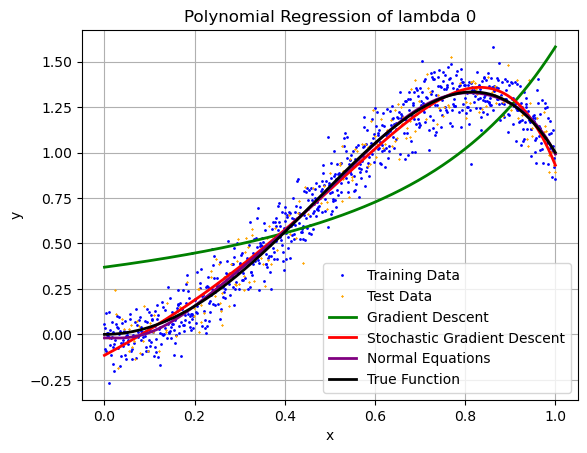

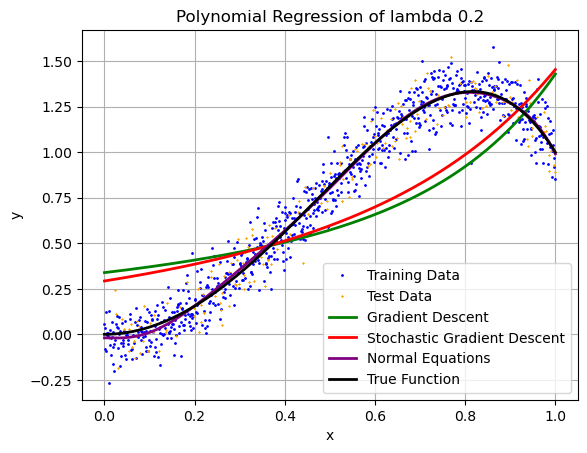

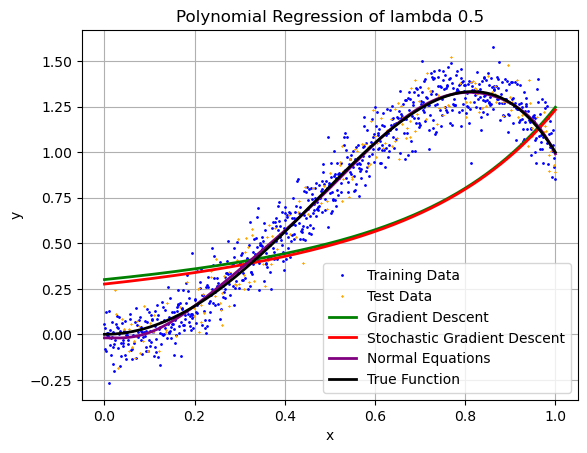

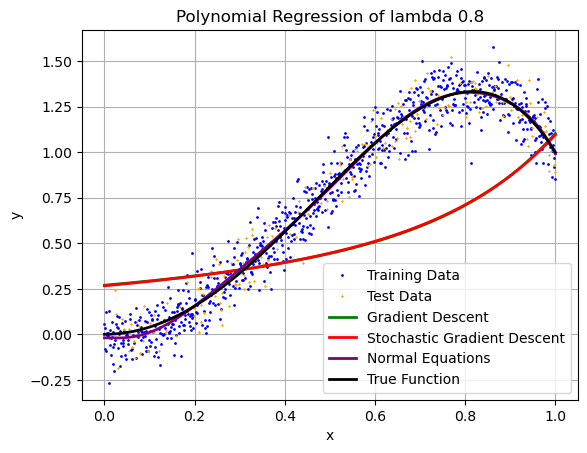

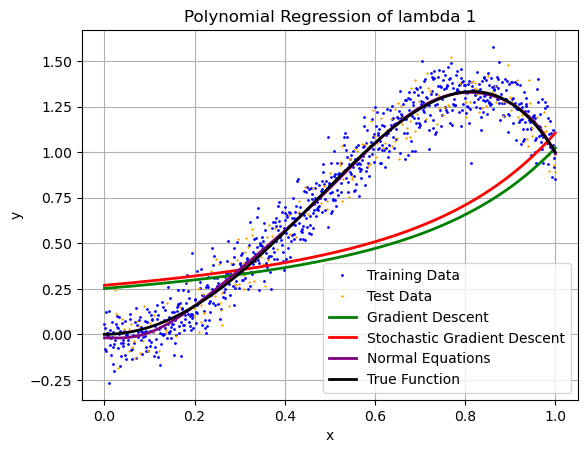

In [162]:
for lamb in lambda_:
    plt.plot(X_train, y_train, 'o', label="Training Data", markersize=1, color="blue")
    plt.plot(X_test, y_test, 'x', label="Test Data", markersize=1, color="orange")

    # Compute theta values
    theta_GD = theta_GD_train(X_train, y_train, K, alpha, n_epochs, lamb)
    theta_SGD = theta_SGD_train(X_train, y_train, K, alpha, n_epochs, batch_size, lamb)
    theta_ne = theta_NE_train(X_train, y_train, K)
    theta_true = [0, 0, 4, 0, -3]

    # Plot the fitted functions with different styles and colors
    plt.plot(X, f(X, theta_GD), label="Gradient Descent", linewidth=2, color="green")
    plt.plot(X, f(X, theta_SGD), label="Stochastic Gradient Descent", linewidth=2, color="red")
    plt.plot(X, f(X, theta_ne), label="Normal Equations", linewidth=2, color="purple")
    plt.plot(X, f(X, theta_true), label="True Function", linewidth=2, color="black")

    # Add labels, title, legend, and grid
    plt.title(f"Polynomial Regression of lambda {lamb}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.legend(loc="best")  # Automatically position the legend

    # Show the plot
    plt.show()

We notice how, as soon as we introduce the lambda parameter (even if very small) our function suddenly changes behaviour. This might be because we introduced too big of a lambda value, forcing the model to shrink toward zeros the thetas.
Let's try to improve oure results further.

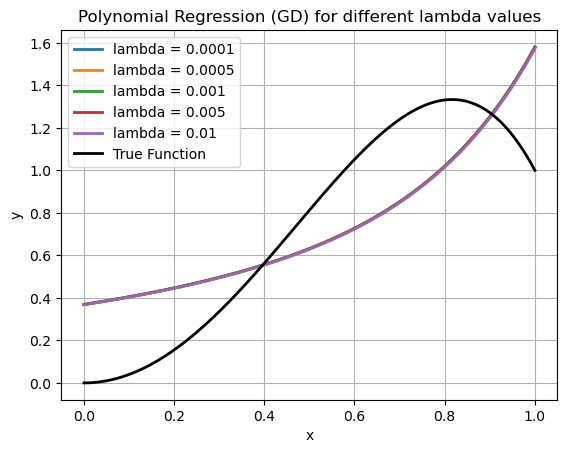

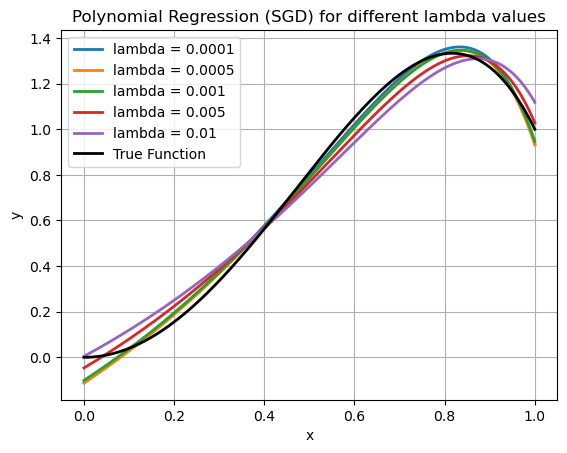

In [167]:
lambda_ = [0.0001, 0.0005, 0.001, 0.005, 0.01]
# theta_ne = theta_NE_train(X_train, y_train, K)
theta_true = [0, 0, 4, 0, -3]
for lamb in lambda_:
    # Compute theta values
    theta_GD = theta_GD_train(X_train, y_train, K, alpha, n_epochs, lamb)
    # Plot the fitted functions with different styles and colors
    plt.plot(X, f(X, theta_GD), label=f"lambda = {lamb}", linewidth=2)
# plt.plot(X_train, y_train, 'o', label="Training Data", markersize=1, color="blue")
# plt.plot(X_test, y_test, 'x', label="Test Data", markersize=1, color="orange")
plt.plot(X, f(X, theta_true), label="True Function", linewidth=2, color="black")
# Add labels, title, legend, and grid
plt.title(f"Polynomial Regression (GD) for different lambda values")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend(loc="best")  # Automatically position the legend
# Show the plot
plt.show()

for lamb in lambda_:
    # Compute theta values
    theta_SGD = theta_SGD_train(X_train, y_train, K, alpha, n_epochs, batch_size, lamb)
    # Plot the fitted functions with different styles and colors
    plt.plot(X, f(X, theta_SGD), label=f"lambda = {lamb}", linewidth=2)
# plt.plot(X_train, y_train, 'o', label="Training Data", markersize=1, color="blue")
# plt.plot(X_test, y_test, 'x', label="Test Data", markersize=1, color="orange")
plt.plot(X, f(X, theta_true), label="True Function", linewidth=2, color="black")
# Add labels, title, legend, and grid
plt.title(f"Polynomial Regression (SGD) for different lambda values")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend(loc="best")  # Automatically position the legend
# Show the plot
plt.show()



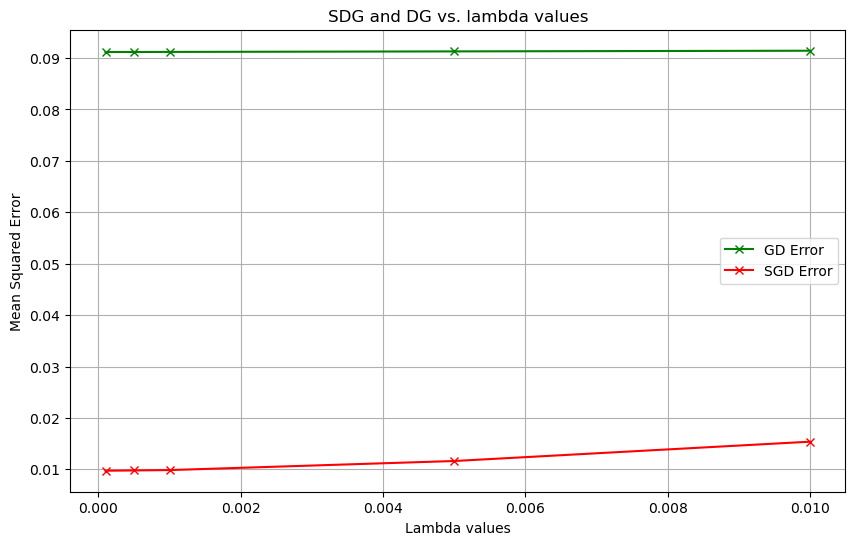

In [171]:
SGD_errors = []
GD_errors = []
for lamb in lambda_:
    theta_SGD = theta_SGD_train(X_train, y_train, K, alpha, n_epochs, batch_size, lamb)
    SGD_error = compute_error(f, theta_SGD, X_test, y_test)   
    SGD_errors.append(SGD_error)
    theta_GD = theta_GD_train(X_train, y_train, K, alpha, n_epochs, lamb)
    GD_error = compute_error(f, theta_GD, X_test, y_test)   
    GD_errors.append(GD_error)


In [172]:
print("------ GD errors ------")
for i in range(len(lambda_)):
    print(f"GD error for lambda = {lambda_[i]} : {GD_errors[i]}")
print("------ SGD errors ------")
for i in range(len(lambda_)):
    print(f"SGD error for lambda = {lambda_[i]} : {SGD_errors[i]}")

------ GD errors ------
GD error for lambda = 0.0001 : 0.09115696853320028
GD error for lambda = 0.0005 : 0.09116662287363318
GD error for lambda = 0.001 : 0.09117876437308976
GD error for lambda = 0.005 : 0.09127882570187061
GD error for lambda = 0.01 : 0.09141116007268116
------ SGD errors ------
SGD error for lambda = 0.0001 : 0.009735771483055836
SGD error for lambda = 0.0005 : 0.009794167929179339
SGD error for lambda = 0.001 : 0.009861593026157694
SGD error for lambda = 0.005 : 0.011624151735046804
SGD error for lambda = 0.01 : 0.015382834119113968
